In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import unittest

In [89]:
pd.set_option("display.max_rows", None)

In [90]:
df = pd.read_csv("epa-sea-level.csv", float_precision="legacy")
df = df.rename(columns = {"Year":"year","CSIRO Adjusted Sea Level":"sea"})
df

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


### Scatter Plot

Text(0.5, 1.0, 'Rise in Sea Level')

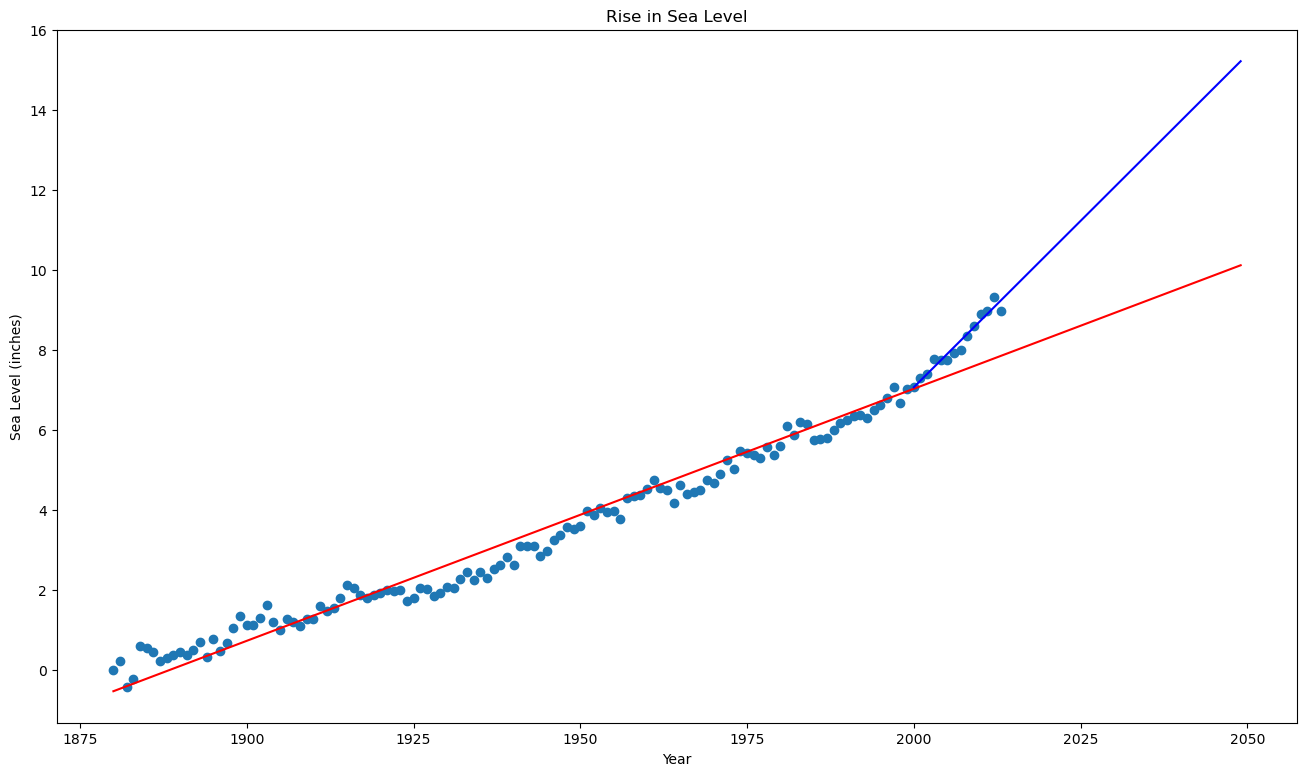

In [91]:
# creating scatter plot

plt.figure(1, figsize=(16,9))
plt.scatter(df["year"],df["sea"])
plt.xlabel("CSIRO Adjusted Sea Level")
plt.ylabel("Year")
#plt.show()

# Create first line of best fit, with existing  data
regress = linregress(df["year"], df["sea"])

# increasing data size for future prediction
last_year = df["year"].max()
new_years = pd.DataFrame({"year": range(last_year + 1, 2050)})
df = pd.concat([df, new_years], ignore_index=True)
#df

plt.plot(
    df["year"], 
    regress.intercept + regress.slope * df["year"],
    c="r",
    label = "fit all",
)
#plt.show()

# creating data frame for recent years
df_recent = df.loc[(df["year"] >= 2000) & (df["year"] <= last_year)]
#df_recent

# creating second best fit line
bestfit = linregress(df_recent["year"],df_recent["sea"])

# df for future years
future_years = pd.DataFrame([{"year": y} for y in range(last_year + 1, 2050)])
df_recent = pd.concat([df_recent, future_years], ignore_index=True)
#df_recent

plt.plot(
    df_recent["year"], 
    bestfit.intercept + bestfit.slope * df_recent["year"],
    c="b",
    label = "fit recent"
    )

# Add label and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
#plt.show()

### SYNTAX for above chart one by one

In [ ]:
# creating scatter plot

plt.figure(1, figsize=(16,9))
plt.scatter(df["year"],df["sea"])
plt.xlabel("CSIRO Adjusted Sea Level")
plt.ylabel("Year")

In [79]:
# Create first line of best fit, with existing  data
regress = linregress(df["year"], df["sea"])

In [80]:
# increasing data size for future prediction
last_year = df["year"].max()
new_years = pd.DataFrame({"year": range(last_year + 1, 2050)})
df = pd.concat([df, new_years], ignore_index=True)
df

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


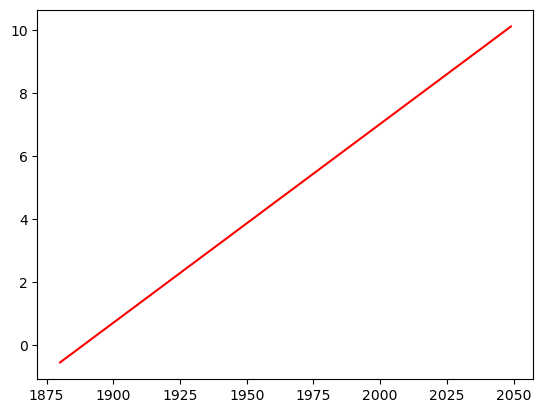

In [81]:
# plotting best fit line
plt.plot(
    df["year"], 
    regress.intercept + regress.slope * df["year"],
    c="r",
    label = "fit all",
)
plt.show()

In [82]:
# creating data frame for recent years
df_recent = df.loc[(df["year"] >= 2000) & (df["year"] <= last_year)]
df_recent


,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [83]:
# creating second best fit line
bestfit = linregress(df_recent["year"],df_recent["sea"])


In [84]:
# df for future years
future_years = pd.DataFrame([{"year": y} for y in range(last_year + 1, 2050)])
df_recent = pd.concat([df_recent, future_years], ignore_index=True)
df_recent

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,2000,7.062992,6.791339,7.334646,6.920582
1,2001,7.287402,7.019685,7.555118,7.087460
2,2002,7.381890,7.110236,7.653543,7.319698
3,2003,7.759843,7.484252,8.035433,7.488353
4,2004,7.740157,7.464567,8.015748,7.507933
5,2005,7.744094,7.472441,8.015748,7.644563
6,2006,7.917323,7.645669,8.188976,7.697420
7,2007,7.996063,7.712598,8.279528,7.702147
8,2008,8.350394,8.078740,8.622047,7.907365
9,2009,8.586614,8.311024,8.862205,8.046354


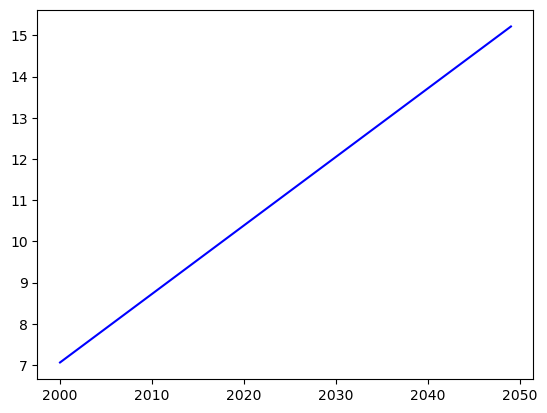

In [85]:
#Plotting the second best fit line

plt.plot(
    df_recent["year"], 
    bestfit.intercept + bestfit.slope * df_recent["year"],
    c="b",
    label = "fit recent"
    )

Text(0.5, 1.0, 'Rise in Sea Level')

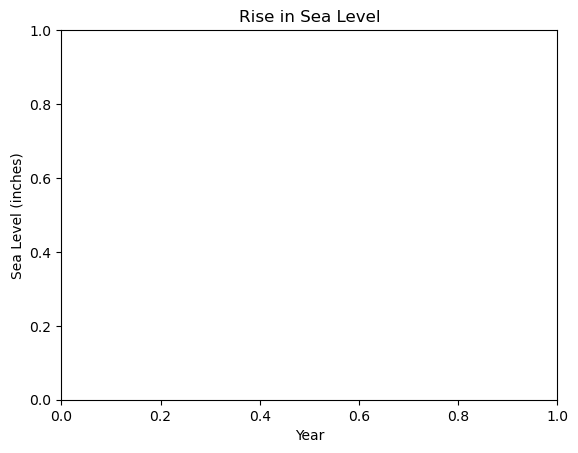

In [87]:
# Add label and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")